In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import pandas as pd

In [65]:
import json

f=open('usagov_bitly_data2012-03-16-1331923249.txt',encoding='utf-8')
data = [json.loads(line) for line in f]
f.close()

print('Total record is',len(data))

Total record is 3560


In [66]:
df = pd.DataFrame(data)
col_names = list(df.columns)

In [67]:
tz = df.tz
print('TimeZone : total is %d, not-null is %d' % (len(tz),tz.count())) # df.count.tz

tz2 = tz.fillna('Missing')
tz2[tz2=='']='Unknown'
tz2.value_counts()[:10]

TimeZone : total is 3560, not-null is 3440


America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

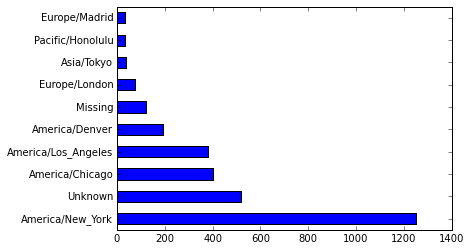

In [68]:
tz_counts = tz2.value_counts()[:10]
tz_counts.plot(kind='barh')

In [77]:
#br = pd.Series([a.split()[0] for a in df.a.dropna()])
br = df.a.dropna().apply(lambda x: x.split()[0])
br.value_counts()[:10]

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
BlackBerry8520/5.0.0.592       3
Dalvik/1.4.0                   3
Name: a, dtype: int64

In [85]:
df_nn = df[df.a.notnull()]
print(len(df), len(df_nn))

win = np.where(df_nn.a.str.contains('Windows'),'Windows','Not Windows')
df_nn.groupby(['tz',win]).size().unstack().fillna(0)[:5]

3560 3440


,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0


<font color=blue size=3>**ㅇ abc**</font><br>
> *khh*<br>
aaa<br>
bbb<br>
>> `abcdefg123`<br>

$$e^x=\sum_{i=0}^\infty \frac{1}{i!}x^i$$

***
```python
df_nn = df[df.a.notnull()]
print(len(df), len(df_nn))
```
---

1. a
1. b
    1. c
    1. d
    
<div class="alert alert-block alert-info">
<b>Tip:</b> Use blue boxes (alert-info) for tips and notes. 
If it’s a note, you don’t have to include the word “Note”.
</div>

<img src='1.png' alt='plot' title='plot' />

__[lecture2](http://github.com/gubosd/lecture2)__

**김현호**
*김현호*
<br>
`abcdefghijklmn`<br>
abcdefghijklmn<br>

<div class = "alert alert-block alert-info">
**Example** : C code style<br>
```
int n = 1;
print("%d\n",n);
```
</div>

<div class = "alert alert-block alert-success">
**Example** : C code style
</div>

>```
int n = 1;
print("%d\n",n);
```


하나둘

> **식1**<br>
> $y = x^2 + 1$

In [1]:
import time
dir(time)

['_STRUCT_TM_ITEMS',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'altzone',
 'asctime',
 'clock',
 'ctime',
 'daylight',
 'get_clock_info',
 'gmtime',
 'localtime',
 'mktime',
 'monotonic',
 'perf_counter',
 'process_time',
 'sleep',
 'strftime',
 'strptime',
 'struct_time',
 'time',
 'timezone',
 'tzname']

In [14]:
time.ctime(time.time())
time.ctime(0)
time.localtime()
#time.gmtime()
# help(time.mktime)
time.time()

1537926743.559473

## dataframe 데이터 골라내기

In [14]:
a = [{'c1': 1, 'c2': 2, 'c3': 3},
     {'c1': 11, 'c2': None, 'c3': 13},
     {'c1': 21, 'c2': 22}]

df = pd.DataFrame(a)
display(df.info(), df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
c1    3 non-null int64
c2    2 non-null float64
c3    2 non-null float64
dtypes: float64(2), int64(1)
memory usage: 112.0 bytes


None

,c1,c2,c3
0,1,2.0,3.0
1,11,NaN,13.0
2,21,22.0,NaN


In [21]:
new_c2 = df.c2.fillna(-1)
display(new_c2, df)

0     2.0
1    -1.0
2    22.0
Name: c2, dtype: float64

,c1,c2,c3
0,1,2.0,3.0
1,11,NaN,13.0
2,21,22.0,NaN


In [26]:
df.c2.isnull()
df[df.c2.notnull()].index
df[df.c2.isnull()].index

Int64Index([1], dtype='int64')

In [44]:
df['c4']=[4,14,24]
df['c5']=[np.nan]*3
df.isnull().any(axis=1)
df.isnull().any(axis=0)
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 5 columns):
c1    3 non-null int64
c2    2 non-null float64
c3    2 non-null float64
c4    3 non-null int64
c5    0 non-null float64
dtypes: float64(3), int64(2)
memory usage: 160.0 bytes


,c1,c2,c3,c4,c5
0,1,2.0,3.0,4,NaN
1,11,NaN,13.0,14,NaN
2,21,22.0,NaN,24,NaN


In [3]:
a2 = [{'c1': '', 'c2': 2, 'c3': 3},
     {'c1': 'korea', 'c2': None, 'c3': 13},
     {'c1': 'japan', 'c2': 22}]

df2 = pd.DataFrame(a2)
display(df2.info(), df2)

NameError: name 'pd' is not defined

In [53]:
df2[(df2.c1=='') | (df2.c2.isnull())]

,c1,c2,c3
0,,2.0,3.0
1,korea,NaN,13.0


In [61]:
df2.c1.str.slice(-2) == 'ea'

0    False
1     True
2    False
Name: c1, dtype: bool

In [64]:
df2.c1.apply(lambda s: s[-2:])

0      
1    ea
2    an
Name: c1, dtype: object

In [79]:
df2.take(df2.c3.argsort()[::-1])

,c1,c2,c3
2,japan,22.0,NaN
1,korea,NaN,13.0
0,,2.0,3.0


In [91]:
df2.take([1,2],axis=1).add([1,2,3],axis=0)

,c2,c3
0,3.0,4.0
1,NaN,15.0
2,25.0,NaN


In [102]:
t = pd.to_datetime(['2018-10-6','20180101',None])
t[0].year, t[0].month, t[0].day

(2018, 10, 6)

In [118]:
a = np.array([[20180101,1.1,2.1],[20180102,11.1,12.1],[20180103,21.1,22.1]])
b = np.c_[a[:,:1]//10000, (a[:,:1]//100)%100, a[:,:1]%100, a]
print(b)

[[2.0180000e+03 1.0000000e+00 1.0000000e+00 2.0180101e+07 1.1000000e+00
  2.1000000e+00]
 [2.0180000e+03 1.0000000e+00 2.0000000e+00 2.0180102e+07 1.1100000e+01
  1.2100000e+01]
 [2.0180000e+03 1.0000000e+00 3.0000000e+00 2.0180103e+07 2.1100000e+01
  2.2100000e+01]]


In [120]:
from mpl_toolkits.mplot3d import Axes3D, axes3d

C:\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


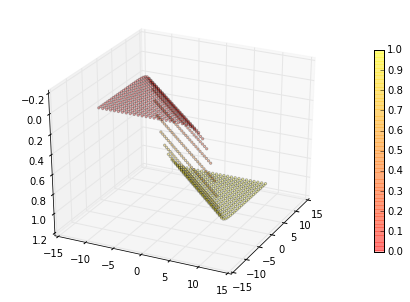

In [179]:
fig = plt.figure()
ax=Axes3D(fig, elev=-152, azim=-26)
# ax = Axes3D(fig)

rng = np.linspace(-10,10,30)
X,Y = np.meshgrid(rng, rng)
Z = 1 / (1+np.exp(-1*(X+Y)))
# Z = np.maximum(X+Y+1,0)

m = ax.scatter(X,Y,Z, c=Z, s=5, cmap='autumn', alpha=0.3)
# ax.plot_surface(X,Y,Z, color='y')
fig.colorbar(m, shrink=0.7)

In [5]:
import numpy as np
a = np.random.rand(3,3); a

array([[0.44794494, 0.12019202, 0.93190175],
       [0.9570614 , 0.63647948, 0.85070273],
       [0.61444184, 0.25042137, 0.77665527]])